In [269]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from tqdm import trange
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [270]:
sides = []
areas = []

for _ in trange(100):
    side_length = random.uniform(0, 1)
    sides.append(side_length)
    areas.append(side_length**2)

split_index = int(0.8 * len(sides))

sides = np.array(sides, dtype=float)
areas = np.array(areas, dtype=float)

sides_train, areas_train = sides[:split_index], areas[:split_index]

sides_test, areas_test = sides[split_index:], areas[split_index:]

100%|██████████| 100/100 [00:00<00:00, 934143.43it/s]


In [271]:
model = keras.Sequential([Dense(units=1, input_shape=[1])])

model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae'])

In [272]:
epochs = 5
history = model.fit(sides_train, areas_train, epochs=epochs)

Epoch 1/5


3/3 [==============================] - 0s 1ms/step - loss: 0.0176 - mae: 0.1008
Epoch 2/5
3/3 [==============================] - 0s 849us/step - loss: 0.0173 - mae: 0.1013
Epoch 3/5
3/3 [==============================] - 0s 1ms/step - loss: 0.0170 - mae: 0.1014
Epoch 4/5
3/3 [==============================] - 0s 1ms/step - loss: 0.0168 - mae: 0.1018
Epoch 5/5
3/3 [==============================] - 0s 975us/step - loss: 0.0166 - mae: 0.1019


In [273]:
model.evaluate(sides_test, areas_test, verbose=2)

1/1 - 0s - loss: 0.0152 - mae: 0.0998 - 43ms/epoch - 43ms/step


[0.015198836103081703, 0.09978165477514267]

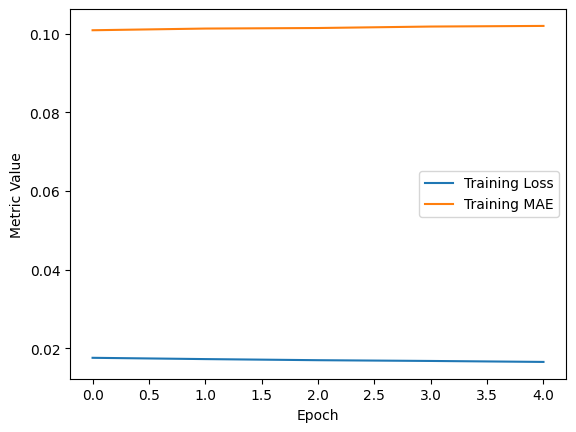

In [274]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

In [275]:
num = 1
test_side_length = [num]
predicted_area = model.predict(test_side_length)
print(f'Predicted Area for Side Length {num}: {predicted_area[0][0]:.4f}')

1/1 [==============================] - 0s 29ms/step
Predicted Area for Side Length 1: 0.6044


# New Code

In [276]:
side_lengths = np.random.uniform(0, 100, 1000)

areas = side_lengths ** 2 

side_lengths = side_lengths.reshape(-1, 1)
areas = areas.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    side_lengths, areas, test_size=0.2, random_state=42)

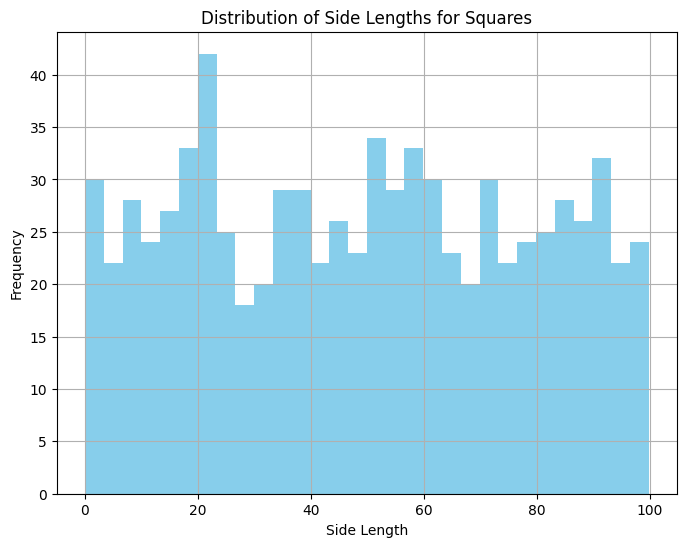

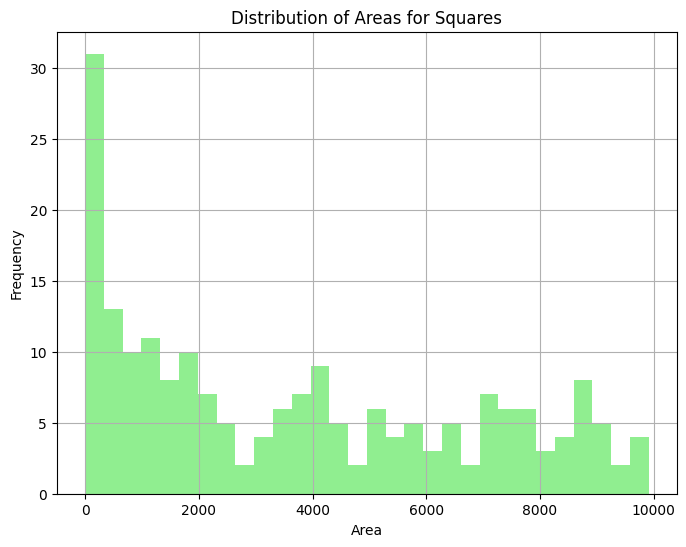

In [277]:
plt.figure(figsize=(8, 6))
plt.hist(X_train, bins=30, color='skyblue')
plt.title('Distribution of Side Lengths for Squares')
plt.xlabel('Side Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=30, color='lightgreen')
plt.title('Distribution of Areas for Squares')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [278]:
model = keras.Sequential([
    Dense(32, input_dim=1, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
25/25 [==============================] - 0s 3ms/step - loss: 18971042.0000 - accuracy: 0.0000e+00 - val_loss: 22681008.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 969us/step - loss: 18869840.0000 - accuracy: 0.0000e+00 - val_loss: 22558262.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 899us/step - loss: 18761164.0000 - accuracy: 0.0000e+00 - val_loss: 22426496.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 921us/step - loss: 18645400.0000 - accuracy: 0.0000e+00 - val_loss: 22280594.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 18514658.0000 - accuracy: 0.0000e+00 - val_loss: 22125094.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 901us/step - loss: 18373546.0000 - accuracy: 0.0000e+00 - val_loss: 21950398.0000 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==

In [279]:
predictions = model.predict(X_test)

loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Data: {loss}")

new_side_length = np.array([[20.0]])
predicted_area = model.predict(new_side_length)
print(
    f"Predicted Area for Side Length {new_side_length[0][0]}: {predicted_area[0][0]}")

7/7 [==============================] - 0s 588us/step - loss: 21085182.0000 - accuracy: 0.0000e+00
Mean Squared Error on Test Data: [21085182.0, 0.0]
1/1 [==============================] - 0s 10ms/step
Predicted Area for Side Length 20.0: 73.10786437988281
